In [1]:
import os
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

In [2]:
u = np.random.rand(100, 3)
u[:, 0] = u[:, 0] + 0.2

In [3]:
def bar_plot_pourcentage_perfmax(u, label_methods, our_bins, save_bool, namesave):
    u_normal = u / np.max(u, 1, keepdims=1)

    u_rank = [st.rankdata(-u[i], method='min') for i in range(np.shape(u)[0])]
    
    fig, axes = plt.subplots(figsize=(18, 7.5), nrows=1, ncols=2)
    ax0, ax1 = axes.flatten()

    ax0.hist(np.array(u_rank), our_bins, density=1, histtype='bar', label=label_methods)
    ax0.legend(prop={'size': 12})
    ax0.set_title('Rank histogram')
    
    ax1.boxplot(u_normal, labels=label_methods)
    ax1.set_title('Boxplot of the ratio to the max performance')
    
    plt.show()
    if save_bool:
        fig.savefig(namesave, format='eps')

### Applied to results on UCR

In [4]:
import csv

with open('results_ucr.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file) 
    
    i=0
    score=[]
    labels_datasets = []
    for line in csv_reader:
        if i == 0:
            labels_methods = np.delete(line[2:-3], 6)
        else:
            labels_datasets.append(line[0])
            score.append([float(x) for x in np.delete(line[2:-3], 6)])
        i += 1
        if i == 85:
            break
    
score = np.array(score)

# Define submatrix with our_scores, and scores_for_comparison
score_ours = score[:, 0:6]
labels_our_methods = labels_methods[0:6]

score_comparison  = score[:, [4, 6, 7, 8, 9, 10]]
labels_comparison = [labels_methods[4]] + list(labels_methods[6:])

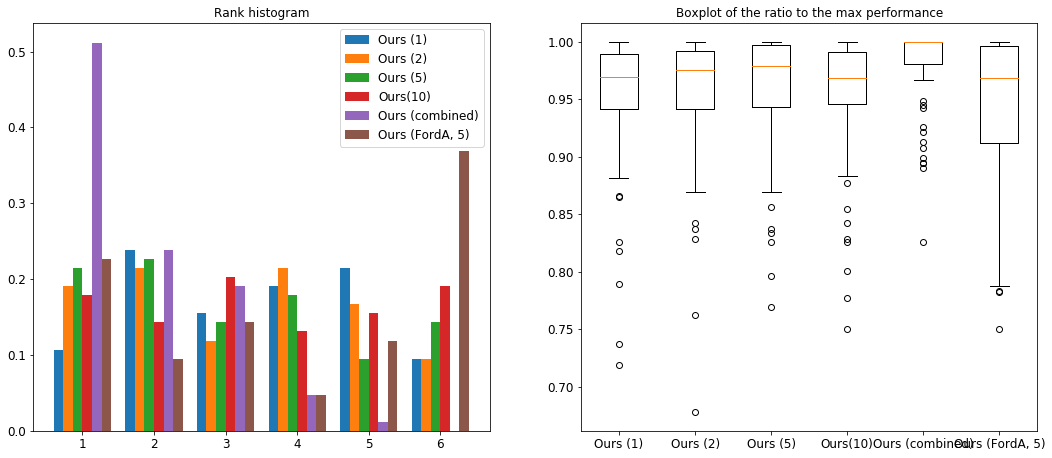

In [5]:
label_methods = labels_our_methods
our_bins = [k+0.5 for k in range(len(label_methods)+1)] 

bar_plot_pourcentage_perfmax(score_ours, label_methods, our_bins, 1, 'Our_methods_plot.eps')

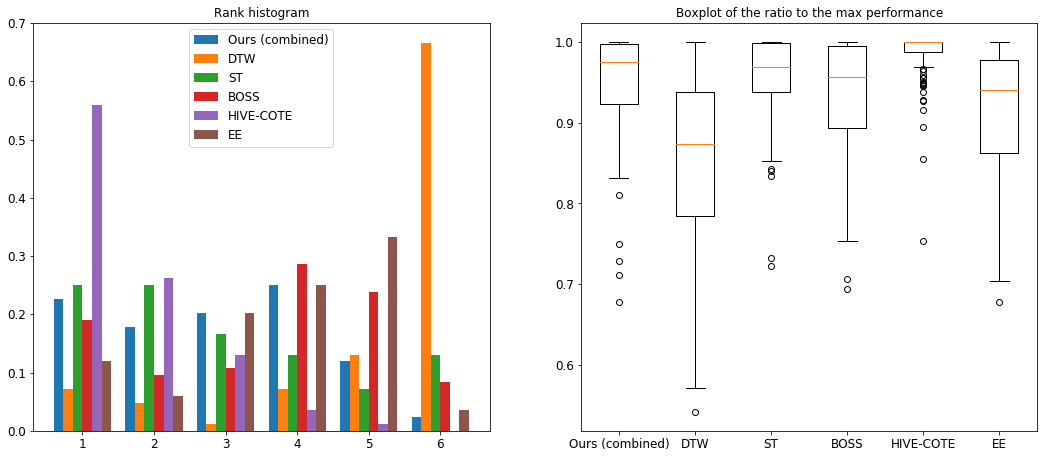

In [6]:
label_methods = labels_comparison
our_bins = [k+0.5 for k in range(len(labels_comparison)+1)]

bar_plot_pourcentage_perfmax(score_comparison[:, [0, 5, 2, 3, 1, 4]], [label_methods[i] for i in [0, 5, 2, 3, 1, 4]], our_bins, 1, 'Comparison_to_other_methods.eps') 

Interpretation:
  - right plot : our method has the second-to-best median when we look at perf / max_perf.
  - left plot : our method is the best ranked in 22% of the cases (19/85) (COTE: 55%, ST: 25%), and in the top 3 in 60% of the cases (COTE: 96%, ST: 66).